In [13]:
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
import numpy as np
from configs.RecursiveVPSDE.Markovian_fQuadSinHF.recursive_Markovian_PostMeanScore_fQuadSinHF2_LowFTh_T256_H05_tl_110data_StbleTgt_LOWNOISE import get_config
from configs.RecursiveVPSDE.Markovian_fSinLog.recursive_Markovian_PostMeanScore_fSinLog_LowFTh_T256_H05_tl_110data_StbleTgt_HIGHNOISE import get_config
from configs.RecursiveVPSDE.Markovian_fBiPot.recursive_Markovian_PostMeanScore_fBiPot_LowFTh_T256_H05_tl_110data_StbleTgt_HIGHNOISE import get_config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
from IPython.core.magic import register_cell_magic

@register_cell_magic
def skip(line, cell):
    return

In [15]:
config = get_config()
root_dir ="/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/"
hermite_dir = root_dir + "ExperimentResults/Ridge/"
if "SinLog" in config.data_path:
    diradd = "SinLog"
elif "QuadSin" in config.data_path:
    diradd = "QuadSinHF"
elif "BiPot" in config.data_path:
    diradd = "BiPot"
if config.diffusion == 0.1:
        diradd+= "LowNoise"
elif config.diffusion == 10.:
    diradd += "HighNoise"
hermite_dir += diradd+"/"
print(hermite_dir)

/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Ridge/BiPotHighNoise/


In [16]:
for f in os.listdir(hermite_dir):
    assert "1024NPath" not in f
    if "MSE" in f:
        print(hermite_dir+f)
        mse = pd.read_parquet(hermite_dir+f, engine="fastparquet")
    elif "est" in f:
        est =(np.load(hermite_dir+f, allow_pickle=True))
    elif "true" in f:
        true =(np.load(hermite_dir+f, allow_pickle=True))


/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Ridge/BiPotHighNoise/Ridge_fBiPot_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_MSEs.parquet


In [17]:
print(mse)

                0
index            
1      413.994934
2      414.002716
3      412.934998
4      412.527924
5      412.363129
6      412.549591
7      412.728058
8      412.923584
9      413.153259
10     413.400177
11     413.637207
12     413.849762
13     414.032593
14     414.182220
15     414.302338
16     414.399658
17     414.477692
18     414.539917
19     414.591248
20     414.630768
21     414.661682
22     414.688873
23     414.710419
24     414.725220
25     414.735443
26     414.744659
27     414.751709
28     414.755035
29     414.756866
30     414.756653
31     414.756042
32     414.753693
33     414.750488
34     414.746918
35     414.740753
36     414.736359
37     414.731750
38     414.726166
39     414.718506
40     414.711212
41     414.703430
42     414.697998
43     414.693237
44     414.685913
45     414.677094
46     414.667389
47     414.660583
48     414.654968
49     414.647705
50     414.640289
51     414.632355
52     414.625214
53     414.618866
54     414

In [18]:
print(mse.dropna().index[np.argmin(mse.dropna().values.flatten()).flatten()])

Int64Index([5], dtype='int64', name='index')


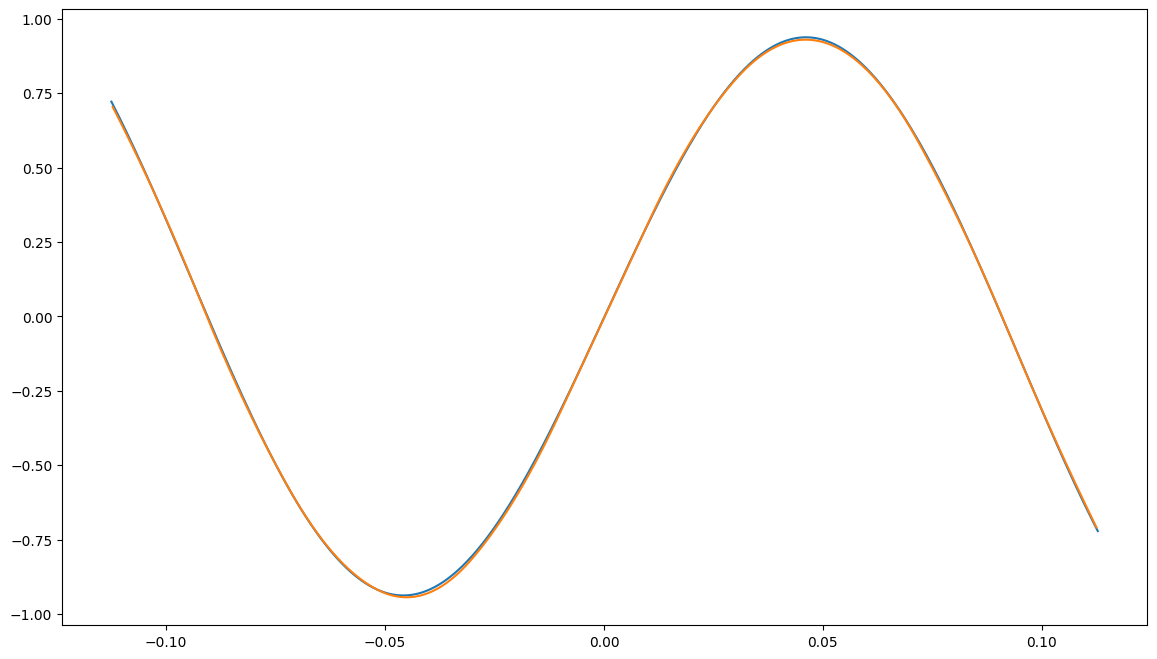

In [47]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(14,8))
if config.diffusion == 10.:
    AN = -12
elif config.diffusion== 0.1:
    AN = -0.15
else:
    AN = -1.5
plt.plot(np.linspace(AN, -AN, 1024), true, label="true")
plt.plot(np.linspace(AN, -AN, 1024), est, label="est")
plt.show()

(array([9.0000e+00, 1.8000e+01, 2.0000e+01, 5.0000e+01, 8.8000e+01,
        1.3200e+02, 2.4200e+02, 3.9000e+02, 6.6300e+02, 1.1340e+03,
        1.8560e+03, 2.9020e+03, 4.2320e+03, 6.4010e+03, 9.2120e+03,
        1.2916e+04, 1.8338e+04, 2.4416e+04, 3.1636e+04, 3.9650e+04,
        4.8472e+04, 5.6978e+04, 6.5644e+04, 7.2047e+04, 7.7281e+04,
        7.9531e+04, 7.9791e+04, 7.7940e+04, 7.1948e+04, 6.6025e+04,
        5.8296e+04, 5.0862e+04, 4.3001e+04, 3.4813e+04, 2.8380e+04,
        2.2736e+04, 1.7899e+04, 1.4380e+04, 1.1331e+04, 9.0800e+03,
        7.6040e+03, 6.3480e+03, 5.5240e+03, 5.1590e+03, 4.6490e+03,
        4.1560e+03, 4.1520e+03, 3.9000e+03, 3.9600e+03, 3.8550e+03,
        3.8320e+03, 3.7650e+03, 3.7460e+03, 3.7740e+03, 3.8820e+03,
        3.9750e+03, 4.0950e+03, 4.2440e+03, 4.4250e+03, 4.5690e+03,
        4.8540e+03, 5.1010e+03, 5.2930e+03, 5.8140e+03, 6.2710e+03,
        6.8920e+03, 7.2170e+03, 8.2890e+03, 9.3490e+03, 1.0117e+04,
        1.0837e+04, 1.1141e+04, 1.0862e+04, 1.03

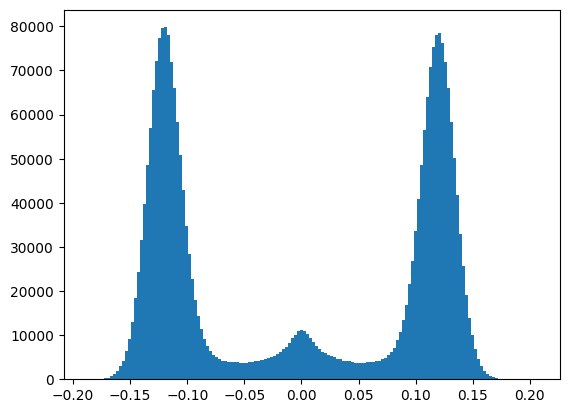

In [48]:
data = np.load(config.data_path, allow_pickle=True)
plt.hist(data.flatten(), bins=150)